# 0. Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


# 1. Load Data

In [3]:
fpt = pd.read_csv('D:/test/data/FPT.csv')
msn = pd.read_csv('D:/test/data/MSN.csv')
pnj = pd.read_csv('D:/test/data/PNJ.csv')
vic = pd.read_csv('D:/test/data/VIC.csv')

In [4]:
df = {'fpt':fpt,
        'msn':msn,
        'pnj':pnj,
        'vic':vic}

Kiểm tra từng tập dữ liệu

In [5]:
df['fpt'].head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [6]:
df['msn'].head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [7]:
df['pnj'].head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


In [8]:
df['msn'].head(5)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [9]:
print(df['fpt'].shape)
print(df['vic'].shape)
print(df['pnj'].shape)
print(df['msn'].shape)

(97406, 8)
(101266, 8)
(125309, 8)
(135354, 8)


In [10]:
stock_list = df.keys()

Thêm một số cột cần thiết

In [11]:
for stock in stock_list:
    df[stock] = df[stock].drop_duplicates(subset = 'Date/Time', keep = 'first')
    df[stock]['Date/Time'] = pd.to_datetime(df[stock]['Date/Time'])
    df[stock]['Date'] = df[stock]['Date/Time'].dt.date
    df[stock]['Year'] = df[stock]['Date/Time'].dt.year

# 2. EDA

## Thông tin và thống kê mô tả của dữ liệu từng mã cổ phiếu

### FPT

In [12]:
df['fpt'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
 8   Date           97406 non-null  object        
 9   Year           97406 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 7.1+ MB


In [13]:
df['fpt'].describe()

,Date/Time,Open,High,Low,Close,Volume,Open Interest,Year
count,97406,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0,97406.000000
mean,2020-01-21 05:08:51.739112192,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0,2019.529844
min,2018-12-25 09:15:00,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0,2018.000000
25%,2019-08-06 11:06:15,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0,2019.000000
50%,2020-01-31 10:37:30,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0,2020.000000
75%,2020-07-14 09:54:45,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0,2020.000000
max,2020-12-22 14:46:00,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0,2020.000000
std,NaN,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0,0.507049


### VIC

In [14]:
df['vic'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         101266 non-null  object        
 1   Date/Time      101266 non-null  datetime64[ns]
 2   Open           101266 non-null  float64       
 3   High           101266 non-null  float64       
 4   Low            101266 non-null  float64       
 5   Close          101266 non-null  float64       
 6   Volume         101266 non-null  int64         
 7   Open Interest  101266 non-null  int64         
 8   Date           101266 non-null  object        
 9   Year           101266 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 7.3+ MB


In [15]:
df['vic'].describe()

,Date/Time,Open,High,Low,Close,Volume,Open Interest,Year
count,101266,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0,101266.000000
mean,2019-12-05 15:50:51.577627392,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0,2019.386566
min,2018-10-17 09:39:00,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0,2018.000000
25%,2019-05-16 13:29:15,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0,2019.000000
50%,2019-12-13 11:09:30,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0,2019.000000
75%,2020-06-25 10:28:45,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0,2020.000000
max,2020-12-22 14:46:00,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0,2020.000000
std,NaN,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0,0.647923


### PNJ

In [16]:
df['pnj'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         125309 non-null  object        
 1   Date/Time      125309 non-null  datetime64[ns]
 2   Open           125309 non-null  float64       
 3   High           125309 non-null  float64       
 4   Low            125309 non-null  float64       
 5   Close          125309 non-null  float64       
 6   Volume         125309 non-null  int64         
 7   Open Interest  125309 non-null  int64         
 8   Date           125309 non-null  object        
 9   Year           125309 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 9.1+ MB


In [17]:
df['pnj'].describe()

,Date/Time,Open,High,Low,Close,Volume,Open Interest,Year
count,125309,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0,125309.000000
mean,2019-08-19 13:55:12.292173568,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0,2019.099219
min,2018-02-28 09:15:00,44.430000,44.530000,44.040000,44.140000,1.000000,0.0,2018.000000
25%,2018-11-15 11:10:00,64.600000,64.700000,64.570000,64.600000,220.000000,0.0,2018.000000
50%,2019-09-05 09:51:00,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0,2019.000000
75%,2020-05-11 14:22:00,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0,2020.000000
max,2020-12-22 14:46:00,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0,2020.000000
std,NaN,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0,0.812994


### MSN

In [18]:
df['msn'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         135354 non-null  object        
 1   Date/Time      135354 non-null  datetime64[ns]
 2   Open           135354 non-null  float64       
 3   High           135354 non-null  float64       
 4   Low            135354 non-null  float64       
 5   Close          135354 non-null  float64       
 6   Volume         135354 non-null  int64         
 7   Open Interest  135354 non-null  int64         
 8   Date           135354 non-null  object        
 9   Year           135354 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 9.8+ MB


In [19]:
df['vic'].describe()

,Date/Time,Open,High,Low,Close,Volume,Open Interest,Year
count,101266,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0,101266.000000
mean,2019-12-05 15:50:51.577627392,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0,2019.386566
min,2018-10-17 09:39:00,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0,2018.000000
25%,2019-05-16 13:29:15,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0,2019.000000
50%,2019-12-13 11:09:30,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0,2019.000000
75%,2020-06-25 10:28:45,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0,2020.000000
max,2020-12-22 14:46:00,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0,2020.000000
std,NaN,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0,0.647923


### Nhận xét về các tập dữ liệu
Về cơ bản các tập dữ liệu đã được làm sạch, không có dữ liệu khuyết. Và nhìn vào Q1, Q2, Q3 có thể thấy dữ liệu không có nhiều outlier, và nếu có thì có thể đó là đặc trưng của dữ liệu. Ví dụ như những đợt bán tháo cổ phiếu vì tin đồn trên các phương tiện truyền thông.

## Xem xét khối lượng giao dịch của các mã cổ phiếu

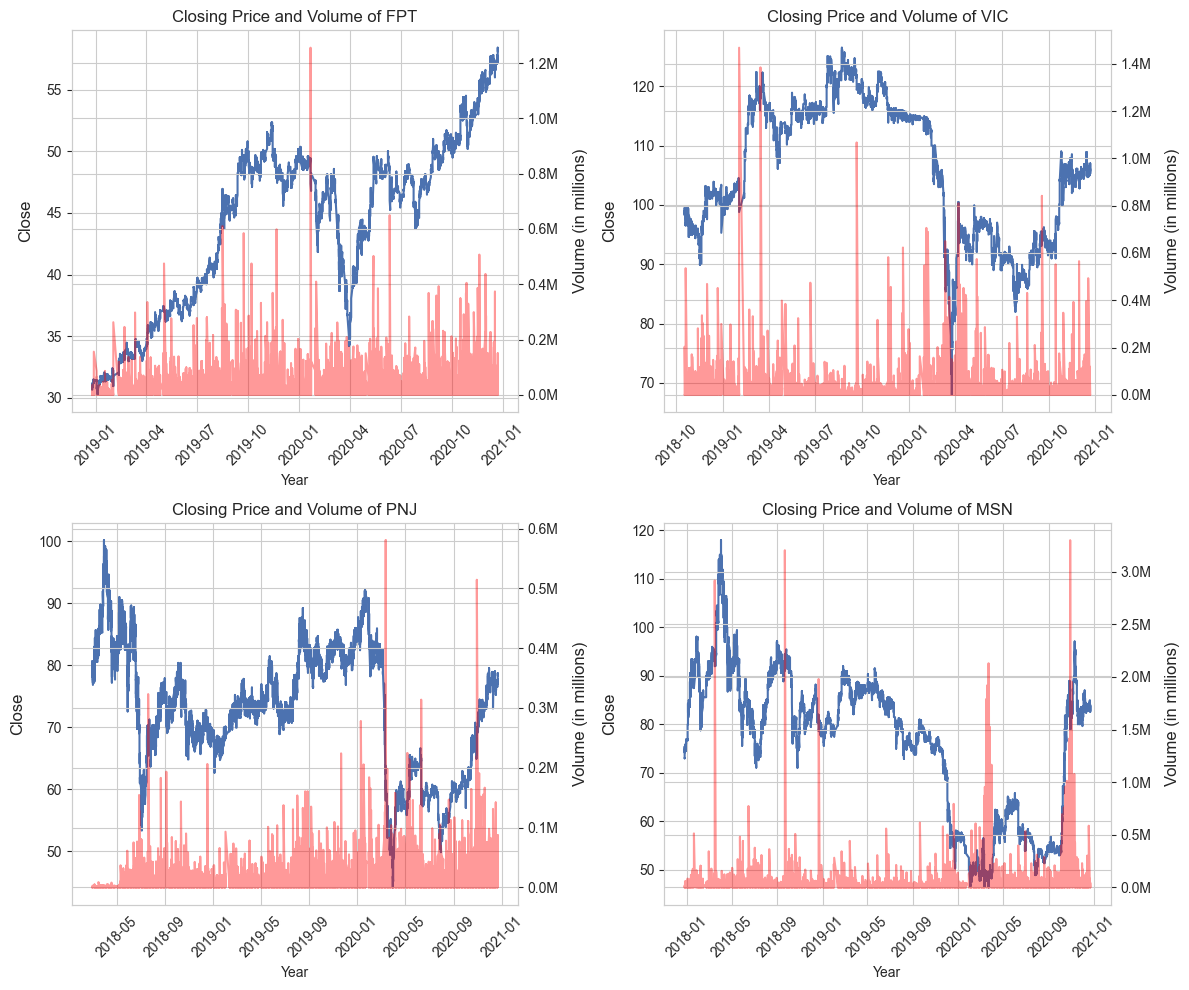

In [57]:
sns.set_style("whitegrid")
sns.set_palette("deep")

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

plt.figure(figsize=(12, 10)) 

num_stocks = len(stock_list)
rows = (num_stocks + 1) // 2 

for i, stock in enumerate(stock_list, 1):
    ax1 = plt.subplot(rows, 2, i) 
    
    ax1.plot(df[stock]['Date'].values, df[stock].Close.values, label=f'{stock.upper()} Close')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Close', fontsize=12, labelpad=10)
    ax1.tick_params(axis='y')
    plt.xticks(rotation=45)
    
    ax2 = ax1.twinx() 
    ax2.plot(df[stock]['Date'].values, df[stock].Volume.values, label=f'{stock.upper()} Volume', color='red', alpha=0.4)

    formatter = FuncFormatter(millions)
    ax2.yaxis.set_major_formatter(formatter)
    
    ax2.set_ylabel('Volume (in millions)', fontsize=12, labelpad=10)
    ax2.tick_params(axis='y')
    
    plt.title(f'Closing Price and Volume of {stock.upper()}')

plt.tight_layout()
plt.show()


Nhận xét:
* Trong hầu hết các biểu đồ, có một mối tương quan nhất định giữa khối lượng giao dịch và sự biến động giá. Khi giá có xu hướng thay đổi mạnh (tăng hoặc giảm), khối lượng giao dịch cũng tăng lên, đặc biệt rõ ràng trong biểu đồ của VIC, PNJ, và MSN.
* Tất cả các cổ phiếu đều có sự biến động trong khoảng thời gian từ 2019 đến 2020, một khoảng thời gian mà có thể liên quan đến các sự kiện toàn cầu như đại dịch COVID-19 và sự ảnh hưởng của nó lên thị trường chứng khoán.
* FPT có xu hướng tăng trưởng ổn định và mạnh mẽ hơn so với các cổ phiếu còn lại, đặc biệt là trong giai đoạn cuối năm 2020. 
* VIC và MSN có biên độ dao động giá rộng hơn và có sự giảm giá đáng kể trong các giai đoạn khác nhau.

# 3. Preprocessing


Loại bỏ các feature không cần thiết

In [21]:
df_tmp = df.copy()
for stock in stock_list:
    df_tmp[stock] = df_tmp[stock][['Close', 'Date']]

Các phiên giao dịch của một ngày chỉ giữ lại giá đóng cửa của phiên giao dịch cuối đại diện cho giá đóng cửa của ngày hôm đó

In [22]:
def clean_df_by_day(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])

    df_cleaned = df.groupby(df[date_column].dt.date).agg(Close=('Close', 'last')).reset_index()
    
    df_cleaned.rename(columns={'index': 'Date'}, inplace=True)

    return df_cleaned

for stock in stock_list:
    df_tmp[stock] = clean_df_by_day(df_tmp[stock], 'Date')
    print(df_tmp[stock].shape)

(499, 2)
(548, 2)
(709, 2)
(748, 2)


C:\Users\hoangNeii\AppData\Local\Temp\ipykernel_2532\3769655166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
C:\Users\hoangNeii\AppData\Local\Temp\ipykernel_2532\3769655166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
C:\Users\hoangNeii\AppData\Local\Temp\ipykernel_2532\3769655166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [23]:
for stock in stock_list:
    df_tmp[stock] = df_tmp[stock].drop(columns='Date',axis=1)

## Scale data and split data

In [25]:
df_trans = {}
sc = {}

for stock in stock_list:
    sc[stock] = MinMaxScaler(feature_range=(0,1))
    transformed_data  = sc[stock].fit_transform(df_tmp[stock])
    df_trans[stock] = pd.DataFrame(transformed_data)

In [26]:
timesteps = 90

X_train = {}
y_train = {}
X_test = {}
y_test = {}
y_valid = {}
sz = {}

for stock in stock_list:
    scale_price_data = df_trans[stock].values
    price_data = df_tmp[stock].values
    
    X = []
    y = []
    y2 = []

    for i in range(len(scale_price_data) - timesteps):
        X.append(scale_price_data[i:i + timesteps])
        y.append(scale_price_data[i + timesteps])   
        y2.append(price_data[i + timesteps])
        
    X = np.array(X)
    y = np.array(y)
    
    sz[stock] = int(len(X) * 0.75)

    X_train[stock], y_train[stock] = X[:sz[stock]], y[:sz[stock]]
    X_test[stock], y_test[stock] = X[sz[stock]:], y[sz[stock]:]
    y_valid[stock] = y2[sz[stock]:]
    
    X_train[stock] = X_train[stock].reshape(X_train[stock].shape[0], X_train[stock].shape[1])
    X_test[stock] = X_test[stock].reshape(X_test[stock].shape[0], X_test[stock].shape[1])
    y_train[stock] = y_train[stock].ravel()
    y_test[stock] = y_test[stock].ravel()

for stock in stock_list:
    print(f"X_train for {stock}: {X_train[stock].shape}")
    print(f"y_train for {stock}: {y_train[stock].shape}")
    print(f"X_test for {stock}: {X_test[stock].shape}")
    print(f"y_test for {stock}: {y_test[stock].shape}")

X_train for fpt: (306, 90)
y_train for fpt: (306,)
X_test for fpt: (103, 90)
y_test for fpt: (103,)
X_train for vic: (343, 90)
y_train for vic: (343,)
X_test for vic: (115, 90)
y_test for vic: (115,)
X_train for pnj: (464, 90)
y_train for pnj: (464,)
X_test for pnj: (155, 90)
y_test for pnj: (155,)
X_train for msn: (493, 90)
y_train for msn: (493,)
X_test for msn: (165, 90)
y_test for msn: (165,)


# 4. Build model

Xây dựng metric đánh giá

In [ ]:
def measure_metric(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    return rmse, mae

## SVR

In [32]:
def usingSVR(X_train, y_train, X_test):
    svr_grid = {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 1],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4] 
    }
    
    grid_search = GridSearchCV(SVR(), svr_grid, cv=5)
    grid_search.fit(X_train, y_train)

    svr_model = grid_search.best_estimator_
    pred = svr_model.predict(X_test)
    return pred

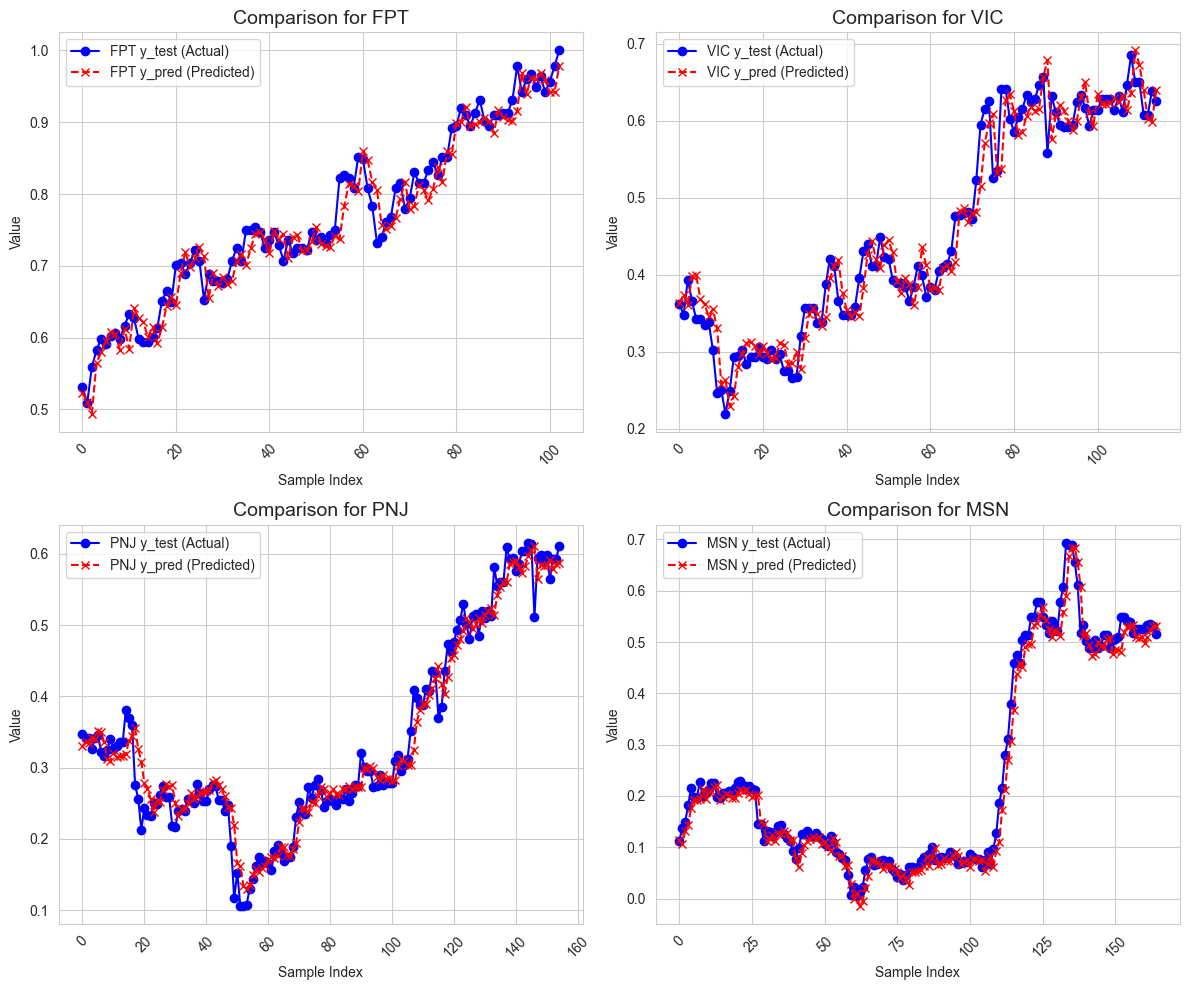

In [54]:
plt.figure(figsize=(12, 10)) 

for i, stock in enumerate(stock_list, 1):
    y_pred = usingSVR(X_train[stock], y_train[stock], X_test[stock])
    
    ax1 = plt.subplot(2, 2, i) 
    ax1.plot(range(len(y_test[stock])), y_test[stock], label=f'{stock.upper()} y_test (Actual)', color='blue', marker='o')
    ax1.plot(range(len(y_pred)), y_pred, label=f'{stock.upper()} y_pred (Predicted)', color='red', linestyle='--', marker='x')

    ax1.set_title(f'Comparison for {stock.upper()}', fontsize=14)
    ax1.set_xlabel('Sample Index')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## LSTM

In [59]:
class LSTMModel:
    def __init__(self, input_shape, units=50, dropout_rate=0.2, optimizer='adam', loss='mean_squared_error'):
        self.input_shape = input_shape
        self.units = units
        self.dropout_rate = dropout_rate
        self.optimizer = optimizer
        self.loss = loss
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        
        model.add(LSTM(units=self.units, return_sequences=True, input_shape=self.input_shape))
        model.add(Dropout(self.dropout_rate))
        
        model.add(LSTM(units=self.units, return_sequences=True))
        model.add(Dropout(self.dropout_rate))
        
        model.add(LSTM(units=self.units, return_sequences=True))
        model.add(Dropout(self.dropout_rate))

        
        model.add(LSTM(units=self.units))
        model.add(Dropout(self.dropout_rate))
        
        model.add(Dense(units=1))
        model.compile(optimizer=self.optimizer, loss=self.loss)

        return model

    def train(self, X_train, y_train, epochs=100, batch_size=8, verbose=1):
        return self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)

    def predict(self, X_test):
        return self.model.predict(X_test)


In [39]:
y_predict = {}

for stock in stock_list:
    input_shape = (X_train[stock].shape[1], 1)
    lstm_model = LSTMModel(input_shape=input_shape)
    lstm_model.train(X_train[stock], y_train[stock])
    y_predict[stock] = lstm_model.predict(X_test[stock])
    

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0882
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0124
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0128
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0135
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0095
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0092
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0088
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0082
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0088
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0063
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0069
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0058
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0085
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0066
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - lo

In [41]:
predictions = {}
for stock in stock_list:
    predictions[stock] = sc[stock].inverse_transform(y_predict[stock])

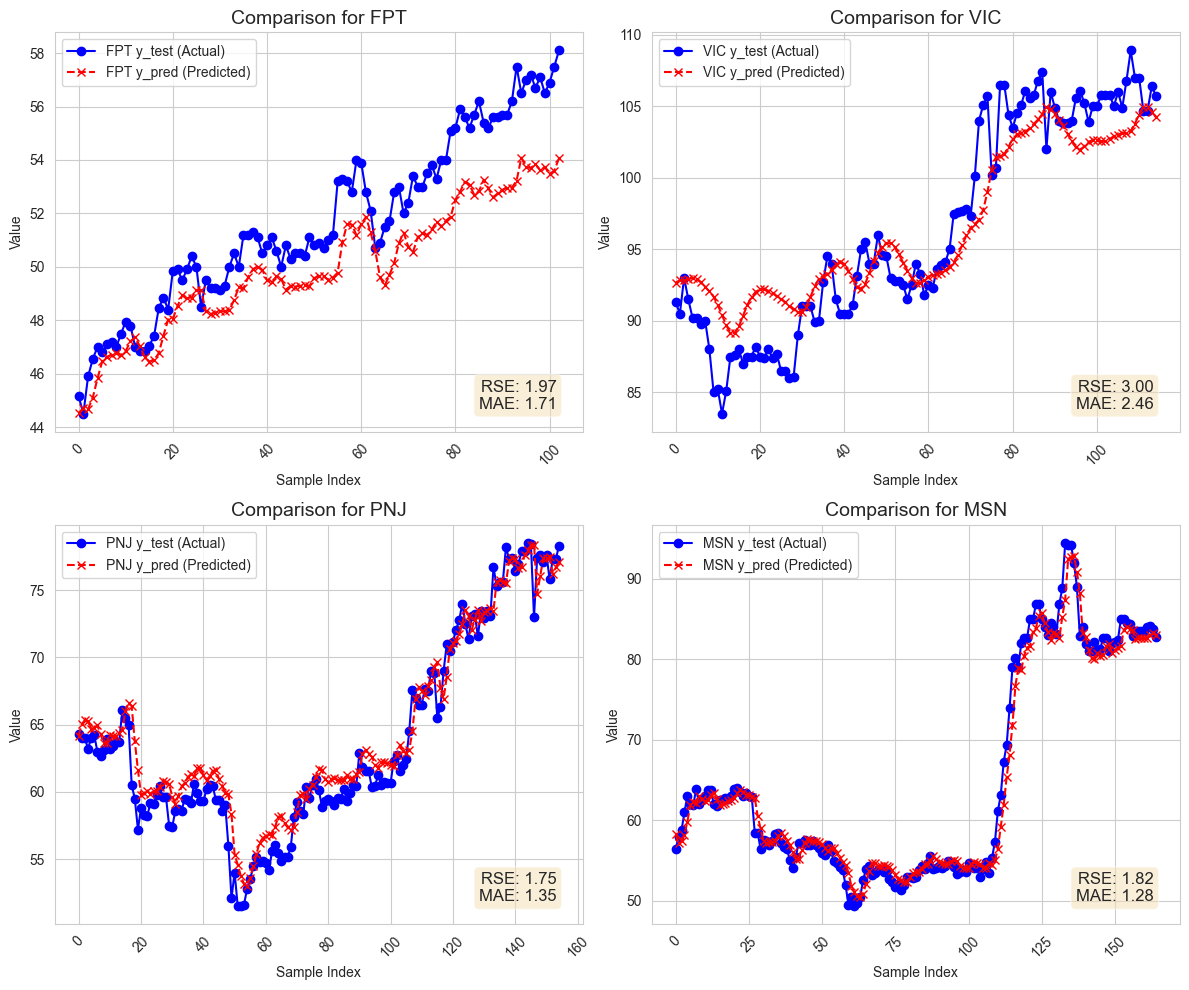

In [51]:
plt.figure(figsize=(12, 10))

for i, stock in enumerate(stock_list, 1):
    ax1 = plt.subplot(2, 2, i)
    
    ax1.plot(range(len(y_valid[stock])), y_valid[stock], label=f'{stock.upper()} y_test (Actual)', color='blue', marker='o')
    ax1.plot(range(len(predictions[stock])), predictions[stock], label=f'{stock.upper()} y_pred (Predicted)', color='red', linestyle='--', marker='x')
    
    ax1.set_title(f'Comparison for {stock.upper()}', fontsize=14)
    ax1.set_xlabel('Sample Index')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True)
    plt.xticks(rotation=45)
    
    rmse, mae = measure_metric(y_valid[stock], predictions[stock])
    
    ax1.text(0.95, 0.05, f'RSE: {rmse:.2f}\nMAE: {mae:.2f}', transform=ax1.transAxes, fontsize=12,
            verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# 5. Kết luận

* SVR thiếu xót khi không đưa giá trị dự đoán về giá trị gốc được dẫn đến việc so sánh chưa hoành chỉnh.
* Nếu nhìn vào biểu đồ thì SVR có khả năng làm tốt hơn LSTM trong tập dữ liệu này trừ cố phiểu MSN. Lý do có thể dữ liệu chưa đủ nhiều hoặc mô hình LSTM chưa đủ tốt,...
* Để cải thiện mô hình có thể tìm hiểu thêm về tin tức, chính sách kinh tế và tình hình chung của xã hội để có thêm những feature tốt cho mô hình.